# **1. Handling Missing Values**

In [17]:
import pandas as pd
import numpy as np


df = pd.read_csv("NFL Play by Play 2009-2016 (v3).csv")

# ضبط seed للـ random عشان النتائج تكون ثابتة
np.random.seed(0)


C:\Users\USER\AppData\Local\Temp\ipykernel_40164\2717960791.py:5: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("NFL Play by Play 2009-2016 (v3).csv")


In [18]:
df.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362447 entries, 0 to 362446
Columns: 102 entries, Date to Season
dtypes: float64(33), int64(31), object(38)
memory usage: 282.1+ MB


In [20]:
df.index

RangeIndex(start=0, stop=362447, step=1)

In [21]:
missing_values_count = df.isnull().sum()
missing_values_count.head(10)

Date                0
GameID              0
Drive               0
qtr                 0
down            54218
time              188
TimeUnder           0
TimeSecs          188
PlayTimeDiff      374
SideofField       450
dtype: int64

In [24]:
total_cells = np.prod(df.shape)   # prod == product
total_missing = missing_values_count.sum()
percent_missing = (total_missing / total_cells) * 100
print(percent_missing)    # نسبة missing value


27.652267428200588


In [28]:
df.dropna()
# كل الصفوف فيها NaN

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


In [29]:
df.dropna(axis=1)

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,AwayTeam,Timeout_Indicator,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,TEN,0,3,3,3,3,3,0.000000,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,...,TEN,0,3,3,3,3,3,0.000000,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,...,TEN,0,3,3,3,3,3,0.000000,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,TEN,0,3,3,3,3,3,0.000000,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,TEN,0,3,3,3,3,3,0.000000,0.0,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362442,2017-01-01,2017010102,20,4,1,10,35,1,35,1,...,GB,0,0,0,0,0,0,0.000000,0.0,2016
362443,2017-01-01,2017010102,20,4,1,0,35,1,0,1,...,GB,0,0,0,0,0,0,0.931115,0.0,2016
362444,2017-01-01,2017010102,21,4,1,0,0,1,0,0,...,GB,0,0,0,0,0,0,0.000000,0.0,2016
362445,2017-01-01,2017010102,21,4,1,10,-1,1,-1,0,...,GB,0,0,0,0,0,0,0.000000,0.0,2016


In [30]:
df.dropna(axis=1).isna().sum()

Date                           0
GameID                         0
Drive                          0
qtr                            0
TimeUnder                      0
ydstogo                        0
ydsnet                         0
PlayAttempted                  0
Yards.Gained                   0
sp                             0
Touchdown                      0
Safety                         0
Onsidekick                     0
PlayType                       0
PassAttempt                    0
AirYards                       0
YardsAfterCatch                0
QBHit                          0
InterceptionThrown             0
RushAttempt                    0
Reception                      0
Fumble                         0
Sack                           0
Challenge.Replay               0
Accepted.Penalty               0
Penalty.Yards                  0
HomeTeam                       0
AwayTeam                       0
Timeout_Indicator              0
posteam_timeouts_pre           0
HomeTimeou

In [33]:
df.bfill(axis=0, limit=5).fillna(0)
# الأول بيملأ NaN بالقيمة اللي بعدها 5 (Backward Fill).
# لو لسه فيه NaN → يغيرها لـ 0.


,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,1.0,15:00,15,3600.0,0.0,TEN,...,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,0.163935,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,-0.010456,0.006029,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362442,2017-01-01,2017010102,20,4,1.0,00:22,1,22.0,6.0,GB,...,0.000000,0.051901,0.948099,0.093435,0.906565,0.051901,0.041534,0.041534,0.000000,2016
362443,2017-01-01,2017010102,20,4,1.0,00:13,1,13.0,9.0,GB,...,0.000000,0.093435,0.906565,0.034069,0.965931,0.093435,-0.059366,0.000000,0.000000,2016
362444,2017-01-01,2017010102,21,4,1.0,00:13,1,13.0,0.0,DET,...,0.000000,0.034069,0.965931,0.035708,0.964292,0.965931,-0.001639,0.000000,0.000000,2016
362445,2017-01-01,2017010102,21,4,1.0,00:12,1,12.0,1.0,DET,...,0.000000,0.035708,0.964292,0.000000,1.000000,0.964292,0.035708,0.000000,0.000000,2016


# **2. Scaling vs. Normalization**

## **الفرق بين Scaling و Normalization**

### **Scaling (التحجيم):**

بيغيّر المدى (Range) بتاع البيانات → زي من 0–8 إلى 0–1.
👉 الشكل (distribution) بتاع البيانات مبيغيّرش.

### **Normalization (التطبيع):**

بيغيّر الشكل نفسه (Distribution) → يحاول يحوّل البيانات لتوزيع طبيعي (Normal Distribution / Bell Curve).

In [2]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(0)


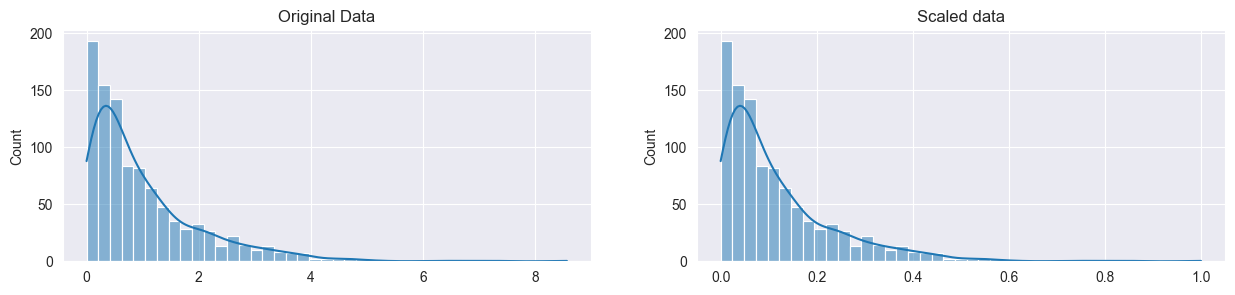

In [3]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

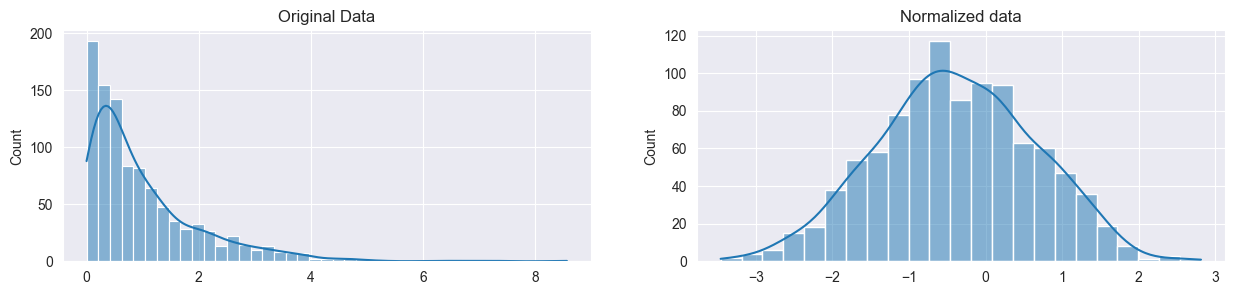

In [6]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

# **3. Parsing Dates**

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

landslides = pd.read_csv("catalog.csv")
np.random.seed(0)
landslides["date"].head()


0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object

In [11]:
landslides["date"] = pd.to_datetime(landslides["date"], format="%m/%d/%y")
landslides["date"].head()
# infer_datetime_format=True → يخلي البانداس يحاول يفهم الشكل بنفسه

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date, dtype: datetime64[ns]

In [13]:
day_landslides = landslides['date'].dt.day
print(day_landslides.head())


0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date, dtype: float64


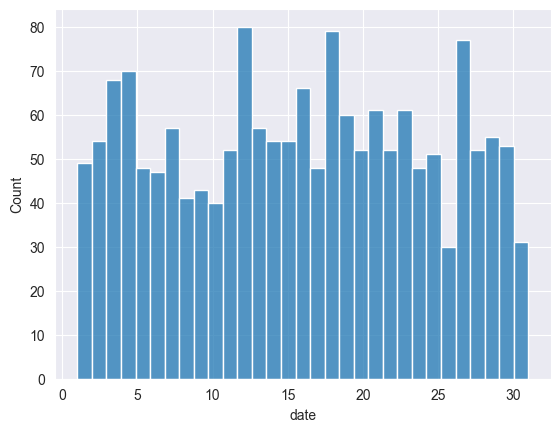

In [19]:
day_landslides = day_landslides.dropna()
sns.histplot(day_landslides, bins=31, kde=False)
plt.show()

# **4. Character Encodings**

## **🔡 التعامل مع الـ Character Encodings في Python & Pandas**

### **1️⃣ يعني إيه Character Encoding؟**

الكمبيوتر بيخزن النصوص كـ أرقام ثنائية (0 و 1).

عشان نفهمها كـ حروف، لازم يكون في قواعد تحويل (Encoding).

أمثلة:

**UTF-8** → المعيار الحديث (يدعم كل اللغات تقريبًا).

**ASCII** → قديم ومحدود (يدعم الحروف الإنجليزية الأساسية فقط).

**Windows-1252** → شائع في ملفات قديمة خاصة بالويندوز.

لو قرأت ملف بترميز مختلف عن الترميز اللي اتكتب بيه → هتشوف Mojibake (نصوص بايظة) أو رموز غريبة ��������.

### **2️⃣ Strings vs Bytes في Python**

In [21]:
before = "This is the euro symbol: €"
print(type(before))  # str
                     # النصوص في Python 3 افتراضيًا UTF-8.


<class 'str'>


In [22]:
after = before.encode("utf-8", errors="replace")
print(type(after))  # bytes
print(after)

# errors="replace"   يستبدل أي حرف مش مدعوم بعلامة استفهام ? أو مربع �.



<class 'bytes'>
b'This is the euro symbol: \xe2\x82\xac'


In [23]:
after.decode("utf-8")  # لما نفك التشفير صح:

'This is the euro symbol: €'

In [24]:
print(after.decode("ascii"))   #    لكن لو حاولنا نفك التشفير غلط (مثلاً ASCII):

# UnicodeDecodeError 🚨


UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 25: ordinal not in range(128)

### **3️⃣ خطر التحويل الخاطئ**

لو حاولنا نخزن نص UTF-8 كأنه ASCII:

In [25]:
bad_bytes = before.encode("ascii", errors="replace")
print(bad_bytes.decode("ascii"))

This is the euro symbol: ?


## **4️⃣ قراءة ملفات مش UTF-8**

افترض عندنا ملف Kickstarter مش متخزن بـ UTF-8:

In [32]:
# kickstarter_2016 = pd.read_csv("ks-projects-201801-utf8.csv")
# UnicodeDecodeError 🚨

C:\Users\USER\AppData\Local\Temp\ipykernel_17528\3041803527.py:1: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  kickstarter_2016 = pd.read_csv("ks-projects-201801-utf8.csv")


In [29]:
import charset_normalizer
# المكتبة دي وظيفتها إنها تتوقع نوع الترميز (encoding) المستخدم في الملفات النصية
# (زي UTF-8، ISO-8859-1، Windows-1252… إلخ).

with open("ks-projects-201801-utf8.csv", "rb") as rawdata:  # rb == read binary
    result = charset_normalizer.detect(rawdata.read(10000))
    # هنا بناخد أول 10000 بايت من الملف (يعني عينة صغيرة).

print(result)

{'encoding': 'utf-8', 'language': 'Spanish', 'confidence': 0.991}


In [34]:
df = pd.read_csv("ks-projects-201801-utf8.csv", encoding="utf-8")
df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_17528\1419100800.py:1: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("ks-projects-201801-utf8.csv", encoding="utf-8")


,Unnamed: 0,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


In [35]:
df.to_csv("ks-projects-201612-utf8.csv", index=False)


# **5. Inconsistent Data Entry**

In [38]:
import pandas as pd
import numpy as np
import fuzzywuzzy
from fuzzywuzzy import process
import charset_normalizer

professors = pd.read_csv("pakistan_intellectual_capital.csv")
np.random.seed(0)
professors.head()


,Unnamed: 0,S#,Teacher Name,University Currently Teaching,Department,Province University Located,Designation,Terminal Degree,Graduated from,Country,Year,Area of Specialization/Research Interests,Other Information
0,2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS,NaN
1,4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,DBMS,NaN
2,5,6,Dr. Junaid Baber,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"Information processing, Multimedia mining",NaN
3,6,7,Dr. Maheen Bakhtyar,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"NLP, Information Retrieval, Question Answering...",NaN
4,24,25,Samina Azim,Sardar Bahadur Khan Women's University,Computer Science,Balochistan,Lecturer,BS,Balochistan University of Information Technolo...,Pakistan,2005.0,VLSI Electronics DLD Database,NaN


In [52]:
countries = professors['Country'].unique()
countries



array(['thailand', 'pakistan', 'germany', 'austria', 'australia', 'uk',
       'china', 'france', 'usofa', 'southkorea', 'malaysia', 'sweden',
       'italy', 'canada', 'norway', 'ireland', 'new zealand', 'urbana',
       'portugal', 'russian federation', 'usa', 'finland', 'netherland',
       'greece', 'turkey', 'south korea', 'macau', 'singapore', 'spain',
       'japan', 'hongkong', 'saudi arabia', 'mauritius', 'scotland'],
      dtype=object)


### **3. تنظيف مبدئي بسيط**


In [53]:
professors['Country'] = professors['Country'].str.lower()
professors['Country'] = professors['Country'].str.strip()
professors['Country'].unique()

array(['thailand', 'pakistan', 'germany', 'austria', 'australia', 'uk',
       'china', 'france', 'usofa', 'southkorea', 'malaysia', 'sweden',
       'italy', 'canada', 'norway', 'ireland', 'new zealand', 'urbana',
       'portugal', 'russian federation', 'usa', 'finland', 'netherland',
       'greece', 'turkey', 'south korea', 'macau', 'singapore', 'spain',
       'japan', 'hongkong', 'saudi arabia', 'mauritius', 'scotland'],
      dtype=object)

In [48]:
matches = fuzzywuzzy.process.extract("south korea", countries,
                                     limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)


In [55]:
categories = [ "australia", "austria", "canada", "china", "finland", "france", "germany",
                    "greece", "hong kong", "ireland", "italy", "japan", "macau", "malaysia",
                    "mauritius", "netherlands", "new zealand", "norway", "pakistan", "portugal",
                    "russian federation", "saudi arabia", "scotland", "singapore", "south korea",
                    "spain", "sweden", "thailand", "turkey", "united kingdom","united states"]
len(categories)

31

In [56]:
from thefuzz import process

for state in categories:
    matches = process.extract(state, professors['Country'], limit=len(professors))
    for match, score, idx in matches:
        if score >= 80:  # threshold
            professors.loc[professors["Country"] == match, "State"] = state

professors['Country'].unique()

array(['thailand', 'pakistan', 'germany', 'austria', 'australia', 'uk',
       'china', 'france', 'usofa', 'southkorea', 'malaysia', 'sweden',
       'italy', 'canada', 'norway', 'ireland', 'new zealand', 'urbana',
       'portugal', 'russian federation', 'usa', 'finland', 'netherland',
       'greece', 'turkey', 'south korea', 'macau', 'singapore', 'spain',
       'japan', 'hongkong', 'saudi arabia', 'mauritius', 'scotland'],
      dtype=object)